In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from pandas.io.json import json_normalize

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akkrishn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
value = input("Enter Stock Symbol:")

Enter Stock Symbol: ma


In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Stock news articles
stock_headlines = newsapi.get_everything(q=value,
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('stock.json', 'w') as json_file:
   json.dump(stock_headlines, json_file)

In [6]:
# Fetch the Federal Reserve news articles
fed_headlines = newsapi.get_everything(q='fed',
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('fed.json', 'w') as json_file:
   json.dump(fed_headlines, json_file)

In [7]:
# Create the Stock sentiment scores DataFrame
tc = pd.read_json ('stock.json')
#parse the json and load into a dataframe
stock_df = json_normalize(stock_headlines['articles'])
#drop all columns except for description
stock_df = stock_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = stock_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
stock_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
stock_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
stock_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
stock_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
stock_df

<ipython-input-7-66e34fd750db>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  stock_df = json_normalize(stock_headlines['articles'])


description    Comp    Pos    Neu  \
0   A house outside of Boston, MA was involved in ... -0.3400  0.000  0.912   
1   MasterCard (MA) closed the most recent trading...  0.0000  0.000  1.000   
2   Cigna (CI) unveils enhanced health plans for i...  0.0000  0.000  1.000   
3   UnitedHealth (UNH) announces MA plans for 2022...  0.0000  0.000  1.000   
4   Mastercard (MA) is set to benefit from the ris...  0.7290  0.320  0.680   
..                                                ...     ...    ...    ...   
95                      Mutual Fund Report for  FSCPX  0.0000  0.000  1.000   
96                      Mutual Fund Report for  MEFZX  0.0000  0.000  1.000   
97  Affirm's (AFRM) shares decrease after Masterca...  0.2023  0.125  0.795   
98                      Mutual Fund Report for  FIUIX  0.0000  0.000  1.000   
99                      Mutual Fund Report for  FSDIX  0.0000  0.000  1.000   

      Neg  
0   0.088  
1   0.000  
2   0.000  
3   0.000  
4   0.000  
..    ...  
95  0.000  
96  0.000  
97  0.080  
98  0.000  
99  0.000  

[100 rows x 5 columns]

In [8]:
# Create the Federal Reserve sentiment scores DataFrame
tc = pd.read_json ('fed.json')
#parse the json and load into a dataframe
fed_df = json_normalize(fed_headlines['articles'])
#drop all columns except for description
fed_df = fed_df.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = fed_df.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
fed_df['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
fed_df['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
fed_df['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
fed_df['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
fed_df

<ipython-input-8-7383dc995c91>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  fed_df = json_normalize(fed_headlines['articles'])


description    Comp    Pos    Neu  \
0   From backpacks to boxer briefs, we have the co...  0.5859  0.179  0.821   
1   After having few cares about the markets all y... -0.3182  0.102  0.717   
2   The Fed is expected to signal that it will slo...  0.4019  0.097  0.903   
3   Here’s what you need to know at the end of the...  0.0000  0.000  1.000   
4   One obstacle to Federal Reserve Chair Jerome P... -0.0516  0.064  0.866   
..                                                ...     ...    ...    ...   
95  Economists predict the month’s data will show ...  0.2846  0.117  0.831   
96  Boston Federal Reserve President Eric Rosengre...  0.4019  0.063  0.937   
97  Lay plans now to defeat your most dastardly en... -0.6344  0.050  0.821   
98  The Federal Reserve, facing a labor market tha...  0.2023  0.057  0.903   
99  It is perhaps as predictable as it is problema... -0.4939  0.057  0.798   

      Neg  
0   0.000  
1   0.181  
2   0.000  
3   0.000  
4   0.070  
..    ...  
95  0.052  
96  0.000  
97  0.129  
98  0.040  
99  0.145  

[100 rows x 5 columns]

In [9]:
# Describe the stock Sentiment
stock_df.describe()

Comp         Pos         Neu         Neg
count  100.000000  100.000000  100.000000  100.000000
mean     0.136200    0.079930    0.883910    0.036180
std      0.407342    0.090709    0.106413    0.058805
min     -0.875000    0.000000    0.519000    0.000000
25%      0.000000    0.000000    0.823750    0.000000
50%      0.000000    0.058000    0.883500    0.000000
75%      0.466675    0.123500    1.000000    0.070750
max      0.970900    0.453000    1.000000    0.251000

In [10]:
# Describe the fed Sentiment
fed_df.describe()

Comp         Pos         Neu         Neg
count  100.000000  100.000000  100.000000  100.000000
mean     0.046166    0.087120    0.841620    0.071230
std      0.448925    0.084154    0.111165    0.080634
min     -0.888500    0.000000    0.530000    0.000000
25%     -0.318200    0.000000    0.774750    0.000000
50%      0.000000    0.074000    0.828500    0.053000
75%      0.406800    0.136500    0.922500    0.129500
max      0.900100    0.470000    1.000000    0.304000

In [11]:
#Tokenizing function libraries to import including the tokenizer and lemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Complete the tokenizer function which removes the stopwords and the punctuation and keeps the relevant words
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [14]:
# Create a new tokens column for the stock
stock_df['tokens'] = stock_df.apply(lambda x : tokenizer(x['description']), axis=1)
stock_df

description    Comp    Pos    Neu  \
0   A house outside of Boston, MA was involved in ... -0.3400  0.000  0.912   
1   MasterCard (MA) closed the most recent trading...  0.0000  0.000  1.000   
2   Cigna (CI) unveils enhanced health plans for i...  0.0000  0.000  1.000   
3   UnitedHealth (UNH) announces MA plans for 2022...  0.0000  0.000  1.000   
4   Mastercard (MA) is set to benefit from the ris...  0.7290  0.320  0.680   
..                                                ...     ...    ...    ...   
95                      Mutual Fund Report for  FSCPX  0.0000  0.000  1.000   
96                      Mutual Fund Report for  MEFZX  0.0000  0.000  1.000   
97  Affirm's (AFRM) shares decrease after Masterca...  0.2023  0.125  0.795   
98                      Mutual Fund Report for  FIUIX  0.0000  0.000  1.000   
99                      Mutual Fund Report for  FSDIX  0.0000  0.000  1.000   

      Neg                                             tokens  
0   0.088  house, outside, boston, involved, fire, placed...  
1   0.000  mastercard, closed, recent, trading, day, movi...  
2   0.000  cigna, ci, unveils, enhanced, health, plan, cu...  
3   0.000  unitedhealth, unh, announces, plan, maintain, ...  
4   0.000  mastercard, set, benefit, rise, retail, sale, ...  
..    ...                                                ...  
95  0.000                        mutual, fund, report, fscpx  
96  0.000                        mutual, fund, report, mefzx  
97  0.080  affirms, afrm, share, decrease, mastercard, an...  
98  0.000                        mutual, fund, report, fiuix  
99  0.000                        mutual, fund, report, fsdix  

[100 rows x 6 columns]

In [16]:
# Create a new tokens column for the fed
fed_df['tokens'] = fed_df.apply(lambda x : tokenizer(x['description']), axis=1)
fed_df

description    Comp    Pos    Neu  \
0   From backpacks to boxer briefs, we have the co...  0.5859  0.179  0.821   
1   After having few cares about the markets all y... -0.3182  0.102  0.717   
2   The Fed is expected to signal that it will slo...  0.4019  0.097  0.903   
3   Here’s what you need to know at the end of the...  0.0000  0.000  1.000   
4   One obstacle to Federal Reserve Chair Jerome P... -0.0516  0.064  0.866   
..                                                ...     ...    ...    ...   
95  Economists predict the month’s data will show ...  0.2846  0.117  0.831   
96  Boston Federal Reserve President Eric Rosengre...  0.4019  0.063  0.937   
97  Lay plans now to defeat your most dastardly en... -0.6344  0.050  0.821   
98  The Federal Reserve, facing a labor market tha...  0.2023  0.057  0.903   
99  It is perhaps as predictable as it is problema... -0.4939  0.057  0.798   

      Neg                                             tokens  
0   0.000  backpack, boxer, brief, complete, rundown, eve...  
1   0.181  care, market, year, investor, getting, nervous...  
2   0.000  fed, expected, signal, slow, bondbuying, begin...  
3   0.000                         here, need, know, end, day  
4   0.070  one, obstacle, federal, reserve, chair, jerome...  
..    ...                                                ...  
95  0.052  economist, predict, month, data, show, gain, n...  
96  0.000  boston, federal, reserve, president, eric, ros...  
97  0.129  lay, plan, defeat, dastardly, enemy, squirrela...  
98  0.040  federal, reserve, facing, labor, market, may, ...  
99  0.145  perhaps, predictable, problematic, within, day...  

[100 rows x 6 columns]

In [17]:
#libraries needed for counting the frequencies of words and phrases germane to the chosen topic
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
#import janitor as jn
#import ConfigParser

In [18]:
# Generate the stock N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(stock_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
stock_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
stock_df_freq_2 = stock_df_freq_2.sort_values(by='frequency', ascending=False)
stock_df_freq_2.head(10)

frequency
show movie              14
apple original          14
apple tv                14
pick left                7
tv cost                  7
watch across             7
tv show                  7
exclusive apple          7
television show          7
left device              7

In [19]:
# Generate the Fed N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(fed_df['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
fed_df_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
fed_df_freq_2 = fed_df_freq_2.sort_values(by='frequency', ascending=False)
fed_df_freq_2.head(10)

frequency
federal reserve          49
central bank             26
jerome powell            13
chair jerome             11
bank president           10
interest rate             8
china evergrande          7
bond purchase             7
reserve chair             6
update price              6

In [20]:
#Wordcloud libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [21]:
#join all text in tokens column into 1 string
corpus_stock = stock_df['tokens'].str.cat(sep=', ')

In [22]:
#join all text in tokens column into 1 string
corpus_fed = fed_df['tokens'].str.cat(sep=', ')

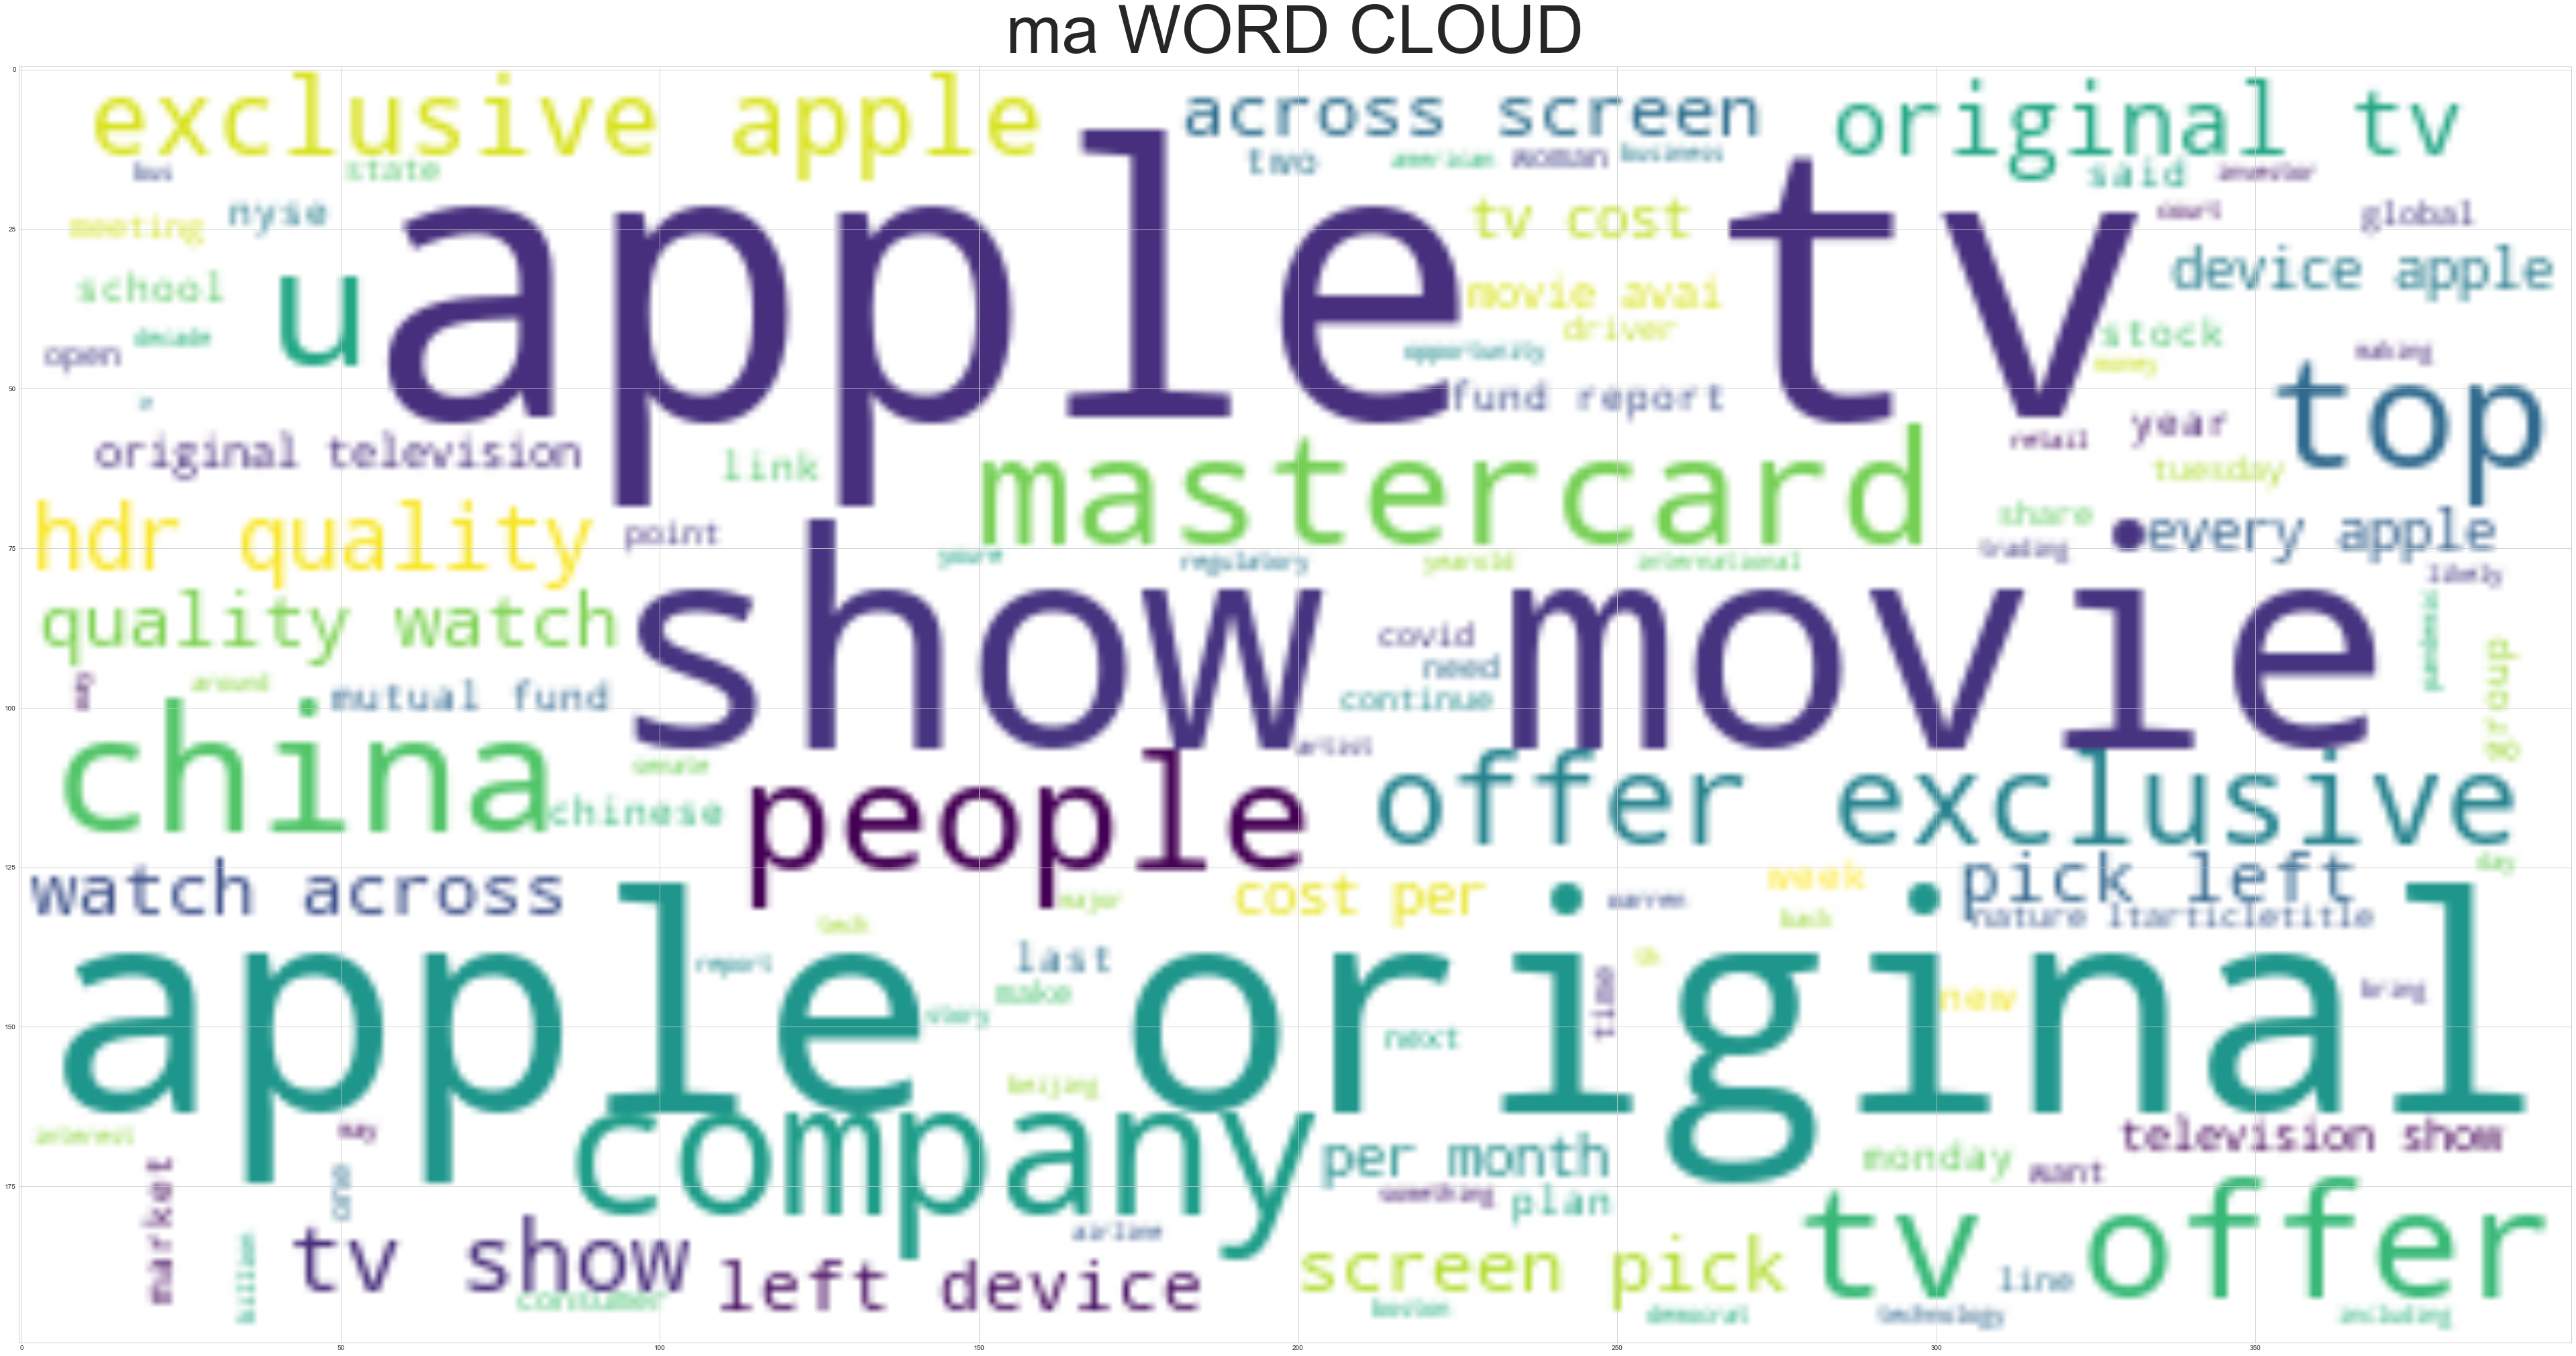

In [23]:
# Generate the stock word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_stock)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title(f"{value} WORD CLOUD",fontsize=100)
plt.show()

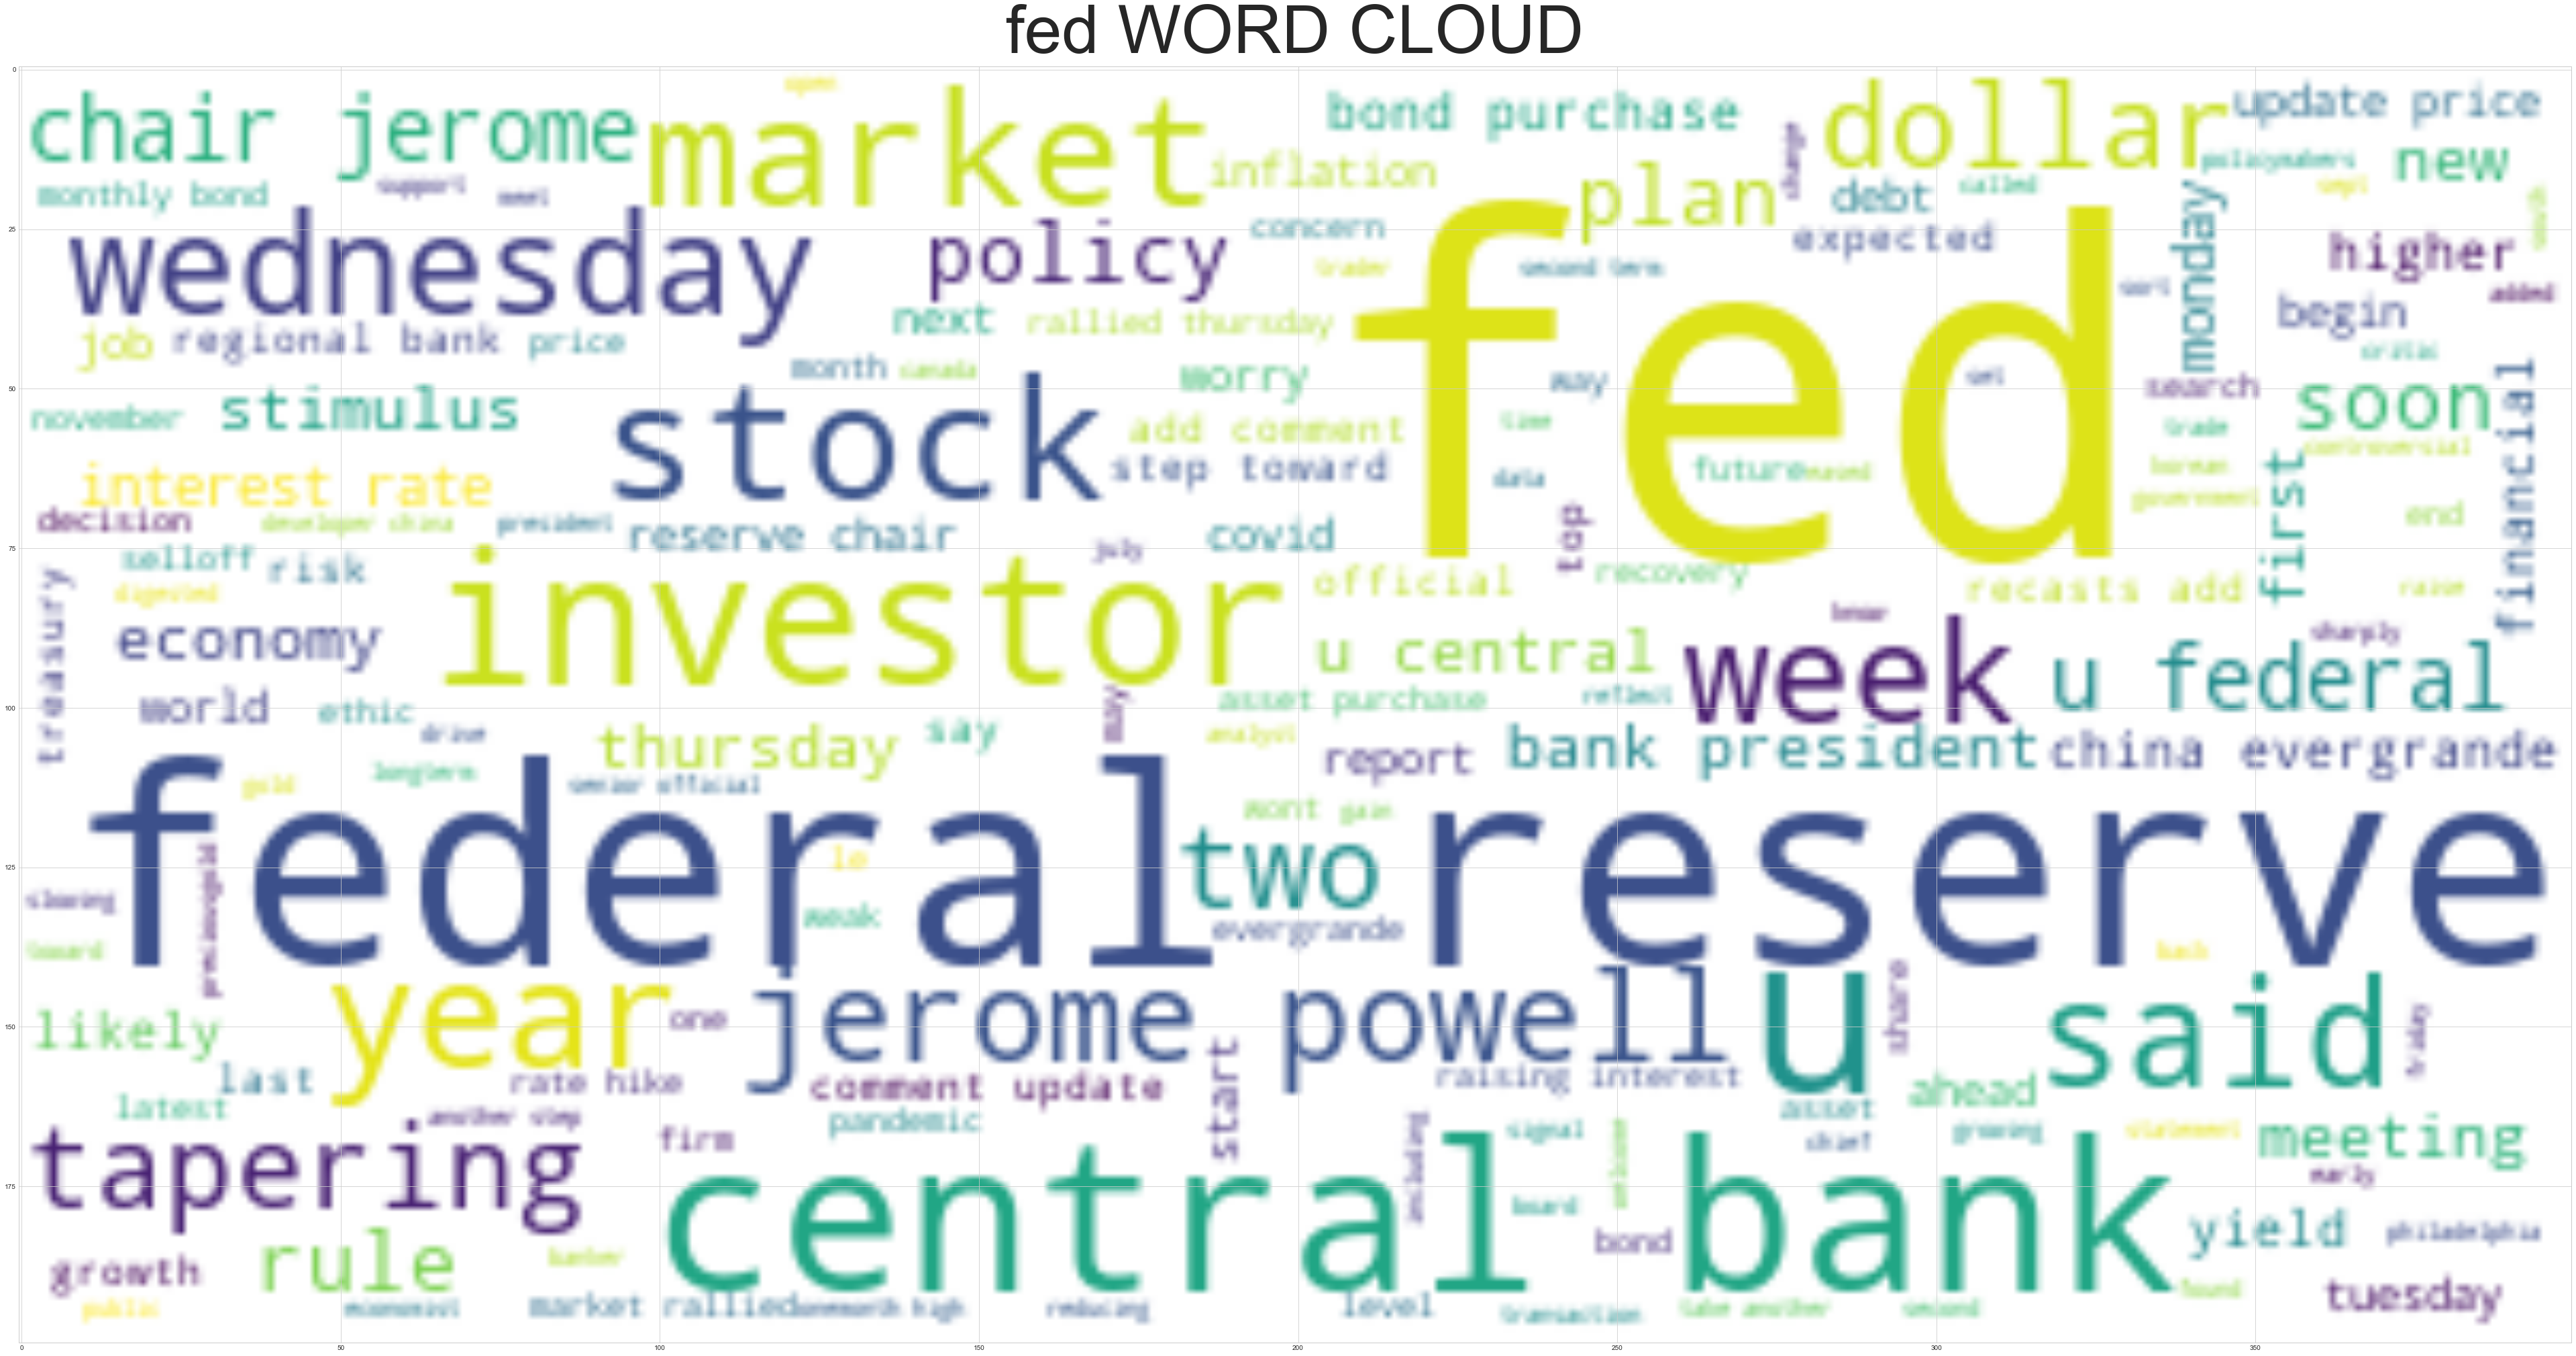

In [24]:
# Generate the Fed word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_fed)
f = plt.figure(figsize=(150,150))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title(f"fed WORD CLOUD",fontsize=100)
plt.show()